In [1]:
%load_ext autoreload
%autoreload 2

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTEN
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import joblib
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from utils import clean_text

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

In [4]:
df = pd.read_csv("/home/emmanuel/Documents/DataScience/tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [5]:
df_n = df.drop(columns='textID')
df_n

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,But it was worth it ****.,But it was worth it ****.,positive


In [6]:
df_n.isna().sum()

text             1
selected_text    1
sentiment        0
dtype: int64

In [7]:
tweets = df_n.dropna()

In [8]:
tweets.isna().sum()

text             0
selected_text    0
sentiment        0
dtype: int64

In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           27480 non-null  object
 1   selected_text  27480 non-null  object
 2   sentiment      27480 non-null  object
dtypes: object(3)
memory usage: 858.8+ KB


In [10]:
tweets['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

Getting the length of each sentence

In [11]:
tweets['length'] = tweets['text'].apply(lambda X: len(str(X).split(' ')))

In [12]:
tweets

,text,selected_text,sentiment,length
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,8
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,11
2,my boss is bullying me...,bullying me,negative,5
3,what interview! leave me alone,leave me alone,negative,6
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,15
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative,18
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative,26
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,24
27479,But it was worth it ****.,But it was worth it ****.,positive,8


graphic representation of the sentence

Text(0, 0.5, 'length')

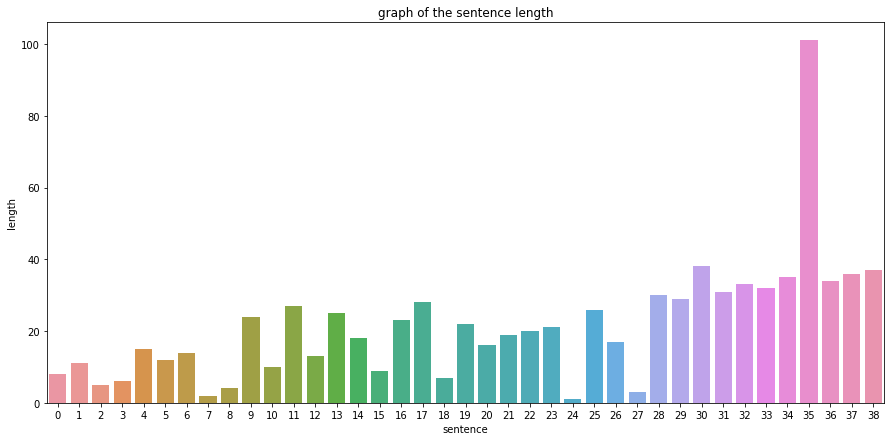

In [13]:
plt.figure(figsize=(15, 7))
unique_length = tweets['length'].unique()
sns.barplot(np.arange(len(unique_length)), unique_length)
plt.title('graph of the sentence length')
plt.xlabel('sentence')
plt.ylabel('length')

Checking for unique words among the sentence

In [14]:
tweets['text'].unique()

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype=object)

Getting the array of the word

In [15]:
tweets['length'].unique()

array([  8,  11,   5,   6,  15,  12,  14,   2,   4,  24,  10,  27,  13,
        25,  18,   9,  23,  28,   7,  22,  16,  19,  20,  21,   1,  26,
        17,   3,  30,  29,  38,  31,  33,  32,  35, 101,  34,  36,  37])

Plot of the sentiment

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64



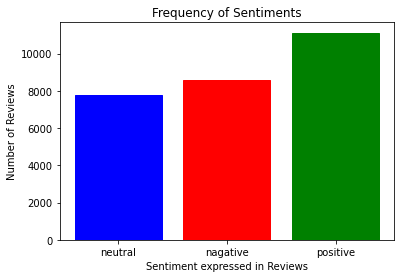

In [16]:
Index = [2, 1, 0]

print(tweets['sentiment'].value_counts())
print()

barlist = plt.bar(Index, tweets['sentiment'].value_counts())

plt.title("Frequency of Sentiments")
plt.xticks(Index, ['positive', 'nagative', 'neutral'])
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

barlist[Index[1]].set_color('red')
barlist[Index[0]].set_color('blue')
barlist[Index[2]].set_color('green')

plt.show()

Application of clean text for bags

In [17]:
tweets['selected_text'] = tweets['text'].apply(clean_text)

Visualizing the most frequent words used in the review

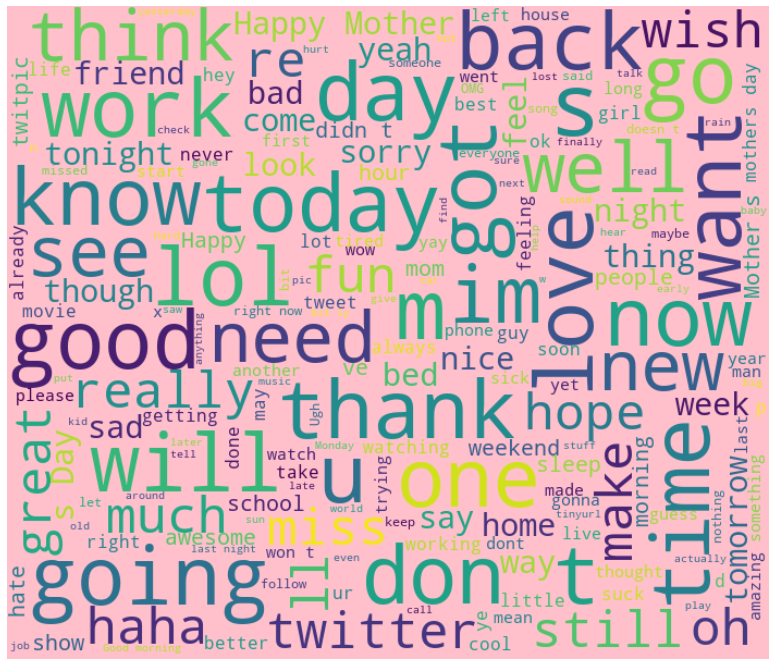

In [18]:
word = " ".join([text for text in tweets['text']])

rainy_word = WordCloud(width = 700, height = 600, random_state = 90, max_font_size = 80, stopwords = STOPWORDS, normalize_plurals=True, collocations=True, relative_scaling=.10, background_color = "pink").generate(word)

plt.figure(figsize = (16, 12))
plt.imshow(rainy_word, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [49]:
x1 = tweets.drop(columns=['sentiment'])
y1 = tweets['sentiment']

In [50]:
x1

,text,selected_text,length
0,"I`d have responded, if I were going",id have responded if i were going,8
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego,11
2,my boss is bullying me...,my bos is bullying me,5
3,what interview! leave me alone,what interview leave me alone,6
4,"Sons of ****, why couldn`t they put them on t...",son of why couldnt they put them on the releas...,15
...,...,...,...
27476,wish we could come see u on Denver husband l...,wish we could come see u on denver husband los...,18
27477,I`ve wondered about rake to. The client has ...,ive wondered about rake to the client ha made ...,26
27478,Yay good for both of you. Enjoy the break - y...,yay good for both of you enjoy the break you p...,24
27479,But it was worth it ****.,but it wa worth it,8


balancing the dataset using oversampling technique

In [51]:
sampling_tweet = SMOTEN(random_state=0)
x, y = sampling_tweet.fit_resample(x1, y1)

In [52]:
X = x['selected_text']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=90)

In [54]:
print(X_train.shape)
print(y_train.shape)

(26680,)
(26680,)


Creating a pipeline for training dataset using frequency based

In [55]:
multi_NB = Pipeline([
    ("bag of words", CountVectorizer(stop_words="english")),
    ("classification", MultinomialNB())
])

In [56]:
model = multi_NB.fit(X_train, y_train)

Create a joblib file

In [57]:
 joblib.dump(multi_NB, "models/multinomial_naive_bayes_with_count_vectorizer.joblib")

['models/multinomial_naive_bayes_with_count_vectorizer.joblib']

In [58]:
yhat = model.predict(X_test)

In [61]:
print(confusion_matrix(y_test, yhat))

[[1505  613  135]
 [ 419 1287  505]
 [  91  444 1672]]


In [63]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

    negative       0.75      0.67      0.71      2253
     neutral       0.55      0.58      0.57      2211
    positive       0.72      0.76      0.74      2207

    accuracy                           0.67      6671
   macro avg       0.67      0.67      0.67      6671
weighted avg       0.67      0.67      0.67      6671



Creating a pipeline for training dataset using frequency based

In [67]:
multi_NBT = Pipeline([
    ("bag of word", TfidfVectorizer(stop_words="english")),
    ("classification", MultinomialNB())
])

In [68]:
multi_NBT.fit(X_train, y_train)

Pipeline(steps=[('bag of word', TfidfVectorizer(stop_words='english')),
                ('classification', MultinomialNB())])

In [69]:
 joblib.dump(multi_NBT, "models/multinomial_naive_bayes_with_tfidf_vectorizer.joblib")

['models/multinomial_naive_bayes_with_tfidf_vectorizer.joblib']

In [70]:
y_predict = multi_NBT.predict(X_test)

confusion_matrix(y_test, y_predict)

array([[1506,  602,  145],
       [ 408, 1279,  524],
       [  98,  444, 1665]])

In [71]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

    negative       0.75      0.67      0.71      2253
     neutral       0.55      0.58      0.56      2211
    positive       0.71      0.75      0.73      2207

    accuracy                           0.67      6671
   macro avg       0.67      0.67      0.67      6671
weighted avg       0.67      0.67      0.67      6671

